In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getcwd(), '..', '..'))
import plda
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data.

In [2]:
# To minimize the size of this repository, I only provide 200 training and 100 testing images.
training_data = np.load('mnist_data/mnist_train_images.npy')
training_labels = np.load('mnist_data/mnist_train_labels.npy')
testing_data = np.load('mnist_data/mnist_test_images.npy')
testing_labels = np.load('mnist_data/mnist_test_labels.npy')

In [3]:
print(training_data.shape, training_labels.shape)
print(testing_data.shape, testing_labels.shape)

(200, 784) (200,)
(100, 784) (100,)


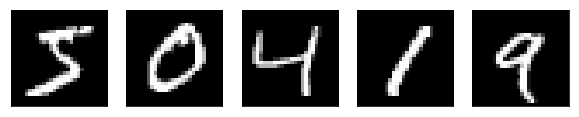

In [4]:
n_examples = 5
fig, ax_arr = plt.subplots(1, n_examples, figsize=(10, 2))

for x in range(n_examples):
    ax_arr[x].imshow(training_data[x].reshape(28, 28), cmap='gray')
    ax_arr[x].set_xticks([])
    ax_arr[x].set_yticks([])
plt.show()

# Optional control over Preprocessing with Principal Components Analysis

In [5]:
classifier = plda.Classifier()

# Use the 5 top principal components to reduce overfitting.
# This will preprocess training data from shape (200, 784) to (200, 5).
classifier.fit_model(training_data, training_labels, n_principal_components=5)

predictions, log_p_predictions = classifier.predict(testing_data)

In [6]:
print('Accuracy: {}'.format((testing_labels == predictions).mean()))

Accuracy: 0.54


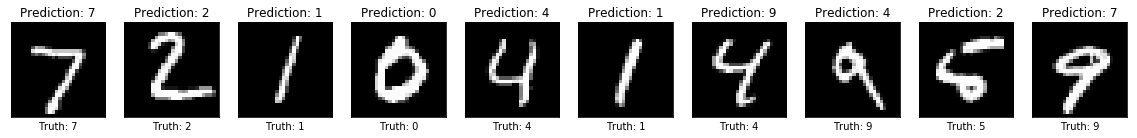

In [7]:
n_examples = 10
fig, ax_arr = plt.subplots(1, n_examples, figsize=(20, 2))

for x in range(n_examples):
    ax_arr[x].imshow(testing_data[x].reshape(28, 28), cmap='gray')
    ax_arr[x].set_xticks([])
    ax_arr[x].set_yticks([])
    title = 'Prediction: {}'
    xlabel = 'Truth: {}'
    ax_arr[x].set_title(title.format(predictions[x]))
    ax_arr[x].set_xlabel(xlabel.format(testing_labels[x]))
plt.show()

# Default setting uses as many Principal Components as possible.

In [8]:
classifier = plda.Classifier()

# Use as many principal components as possible.
classifier.fit_model(training_data, training_labels)

predictions, log_p_predictions = classifier.predict(testing_data)

In [9]:
# Overfit due to curse of dimensionality:
#  ratio of avg. sample size to data dimension is very small
#  (about ~20 / 200 = ~.2).
print('Accuracy: {}'.format((testing_labels == predictions).mean()))

Accuracy: 0.28


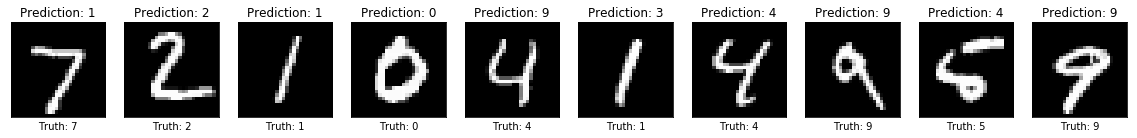

In [10]:
n_examples = 10
fig, ax_arr = plt.subplots(1, n_examples, figsize=(20, 2))

for x in range(n_examples):
    ax_arr[x].imshow(testing_data[x].reshape(28, 28), cmap='gray')
    ax_arr[x].set_xticks([])
    ax_arr[x].set_yticks([])
    title = 'Prediction: {}'
    xlabel = 'Truth: {}'
    ax_arr[x].set_title(title.format(predictions[x]))
    ax_arr[x].set_xlabel(xlabel.format(testing_labels[x]))
plt.show()

# Getting PCA Preprocessing information

In [11]:
type(classifier.model.pca)

sklearn.decomposition.pca.PCA

In [12]:
classifier.model.pca

PCA(copy=True, iterated_power='auto', n_components=190, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
classifier.model.pca.n_features_  # Original dimensionality.

784

In [14]:
classifier.model.pca.n_components  # Preprocessed dimensionality

190

# Parameters fitted via Maximum Likelihood of the Data

In [15]:
Psi = classifier.model.Psi
A = classifier.model.A
inv_A = classifier.model.inv_A
m = classifier.model.m

# Indices of the subspace used for classification.
relevant_U_dims = classifier.model.relevant_U_dims

# Prior Gaussian Parameters

In [16]:
classifier.model.prior_params.keys()

dict_keys(['cov_diag', 'mean'])

# Posterior Gaussian Parameters

In [17]:
# Categories in the training data.
classifier.model.posterior_params.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# Parameters for a category.
classifier.model.posterior_params[0].keys()

dict_keys(['cov_diag', 'mean'])

# Posterior Predictive Gaussian Parameters

In [19]:
# Categories in the training data.
classifier.model.posterior_predictive_params.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
# Parameters for a category.
classifier.model.posterior_predictive_params[0].keys()

dict_keys(['cov_diag', 'mean'])

# Transforming Data to PLDA Space

There are 4 "spaces" that result from the transformations the model performs:
1. Data space ('D'),
2. Preprocessed data space ('X'),
3. Latent space ('U'), and
4. The "effective" subspace of the latent space ('U_model'), 
    which is essentially the set of dimensions the model actually uses for prediction.

You can transform data between these spaces using the `classifier.model.transform()` function.

In [21]:
U_model = classifier.model.transform(training_data, from_space='D', to_space='U_model')

print(training_data.shape)
print(U_model.shape)

(200, 784)
(200, 9)


In [22]:
D = classifier.model.transform(U_model, from_space='U_model', to_space='D')

print(U_model.shape)
print(D.shape)

(200, 9)
(200, 784)
